In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
car = pd.read_csv("../datasets/cars/New_cars_preprocessed.csv")
car.head()

,Unnamed: 0,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,SAE Net Horsepower @ RPM,Displacement,...,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Fuel System_DI,Fuel System_Electric FI,Fuel System_SFI,Trans Description Cont._Automatic,Trans Description Cont._CVT,Trans Description Cont._Manual
0,0,40600.0,22.0,10,5,4,108.3,280.0,272.0,2.0,...,0,0,1,0,1,0,0,1,0,0
1,1,45500.0,22.0,10,5,4,108.3,280.0,272.0,2.0,...,0,0,1,0,1,0,0,1,0,0
2,2,43600.0,22.0,10,5,4,108.3,280.0,272.0,2.0,...,0,0,1,0,1,0,0,1,0,0
3,3,37400.0,22.0,10,5,4,108.3,280.0,272.0,2.0,...,0,0,1,0,1,0,0,1,0,0
4,4,42600.0,21.0,10,5,4,108.3,280.0,272.0,2.0,...,0,1,0,0,1,0,0,1,0,0


In [4]:
X_car = car.copy()
y_car = X_car.pop("MSRP")
colnames_car = X_car.columns
colnames = X_car.columns

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            32262 non-null  int64  
 1   MSRP                                  32262 non-null  float64
 2   EPA Fuel Economy Est - City (MPG)     32262 non-null  float64
 3   Engine                                32262 non-null  int64  
 4   Passenger Capacity                    32262 non-null  int64  
 5   Passenger Doors                       32262 non-null  int64  
 6   Wheelbase (in)                        32262 non-null  float64
 7   SAE Net Torque @ RPM                  32262 non-null  float64
 8   SAE Net Horsepower @ RPM              32262 non-null  float64
 9   Displacement                          32262 non-null  float64
 10  Trans Type                            32262 non-null  int64  
 11  Air Bag-Side He

In [6]:
model = DecisionTreeRegressor()
model.fit(X_car, y_car)

DecisionTreeRegressor()

Feature: 0, Score: 0.01781
Feature: 1, Score: 0.00211
Feature: 2, Score: 0.00057
Feature: 3, Score: 0.00386
Feature: 4, Score: 0.00204
Feature: 5, Score: 0.02176
Feature: 6, Score: 0.01553
Feature: 7, Score: 0.55080
Feature: 8, Score: 0.04332
Feature: 9, Score: 0.00262
Feature: 10, Score: 0.00058
Feature: 11, Score: 0.00057
Feature: 12, Score: 0.00087
Feature: 13, Score: 0.00018
Feature: 14, Score: 0.00441
Feature: 15, Score: 0.00009
Feature: 16, Score: 0.00120
Feature: 17, Score: 0.26809
Feature: 18, Score: 0.00040
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00094
Feature: 21, Score: 0.00385
Feature: 22, Score: 0.00163
Feature: 23, Score: 0.00566
Feature: 24, Score: 0.00123
Feature: 25, Score: 0.02177
Feature: 26, Score: 0.00434
Feature: 27, Score: 0.00406
Feature: 28, Score: 0.00529
Feature: 29, Score: 0.00635
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00047
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00261
Feature: 34, Score: 0.00107
Feature: 35, Score: 0.00023
Fe

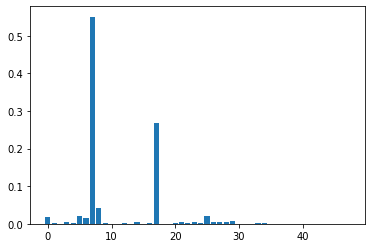

In [7]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
cart = DecisionTreeRegressor()
cart.fit(X_car,y_car)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'Unnamed: 0': 0.03,
  'EPA Fuel Economy Est - City (MPG)': 0.0,
  'Engine': 0.0,
  'Passenger Capacity': 0.01,
  'Passenger Doors': 0.0,
  'Wheelbase (in)': 0.04,
  'SAE Net Torque @ RPM': 0.04,
  'SAE Net Horsepower @ RPM': 1.0,
  'Displacement': 0.07,
  'Trans Type': 0.0,
  'Air Bag-Side Head-Front': 0.0,
  'Air Bag-Side Head-Rear': 0.0,
  'Child Safety Rear Door Locks': 0.0,
  'Daytime Running Lights': 0.0,
  'Traction Control': 0.01,
  'Night Vision': 0.0,
  'Rollover Protection Bars': 0.0,
  'Basic Miles/km': 0.48,
  'Basic Years': 0.01,
  'Corrosion Miles/km': 0.0,
  'Corrosion Years': 0.0,
  'Drivetrain Miles/km': 0.01,
  'Drivetrain Years': 0.0,
  'Turning Diameter - Curb to Curb (ft)': 0.01,
  'Roadside Assistance Miles/km': 0.0,
  'Manufacturer': 0.05,
  'Model year': 0.01,
  'Front tire width': 0.01,
  'Front tire aspect ratio': 0.01,
  'Front tire rim size': 0.01,
  'Front Wheel Material_Alloy': 0.0,
  'Front Wheel Material_Aluminum': 0.0,
  'Front Wheel Material_

In [9]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index
rank_df

,CART,feature_name
Unnamed: 0,7.0,Unnamed: 0
EPA Fuel Economy Est - City (MPG),32.5,EPA Fuel Economy Est - City (MPG)
Engine,32.5,Engine
Passenger Capacity,12.0,Passenger Capacity
Passenger Doors,32.5,Passenger Doors
Wheelbase (in),5.5,Wheelbase (in)
SAE Net Torque @ RPM,5.5,SAE Net Torque @ RPM
SAE Net Horsepower @ RPM,1.0,SAE Net Horsepower @ RPM
Displacement,3.0,Displacement
Trans Type,32.5,Trans Type


In [10]:
rank_df.to_csv('../data/cars_featureranks_CART.csv', sep=';',index=False)